In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Question 1:

#### Data Collection

In [2]:
BTC = yf.download('BTC-USD', start='2022-12-22', end='2022-12-23',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00,16818.380859,16818.380859,16818.380859,16818.380859,16818.380859,0
2022-12-22 00:01:00,16825.763672,16825.763672,16825.763672,16825.763672,16825.763672,0
2022-12-22 00:02:00,16824.031250,16824.031250,16824.031250,16824.031250,16824.031250,1409024
2022-12-22 00:03:00,16829.160156,16829.160156,16829.160156,16829.160156,16829.160156,0
2022-12-22 00:04:00,16829.492188,16829.492188,16829.492188,16829.492188,16829.492188,0
...,...,...,...,...,...,...
2022-12-22 23:54:00,16829.533203,16829.533203,16829.533203,16829.533203,16829.533203,1167360
2022-12-22 23:55:00,16828.492188,16828.492188,16828.492188,16828.492188,16828.492188,17562624
2022-12-22 23:56:00,16829.121094,16829.121094,16829.121094,16829.121094,16829.121094,0


In [4]:
ETH = yf.download('ETH-USD', start='2022-12-22', end='2022-12-23',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00,1213.672607,1213.672607,1213.672607,1213.672607,1213.672607,0
2022-12-22 00:01:00,1214.051025,1214.051025,1214.051025,1214.051025,1214.051025,0
2022-12-22 00:02:00,1213.826782,1213.826782,1213.826782,1213.826782,1213.826782,0
2022-12-22 00:03:00,1214.177002,1214.177002,1214.177002,1214.177002,1214.177002,5888
2022-12-22 00:04:00,1214.120728,1214.120728,1214.120728,1214.120728,1214.120728,0
...,...,...,...,...,...,...
2022-12-22 23:54:00,1218.223511,1218.223511,1218.223511,1218.223511,1218.223511,523776
2022-12-22 23:55:00,1218.341797,1218.341797,1218.341797,1218.341797,1218.341797,4136960
2022-12-22 23:56:00,1218.353638,1218.353638,1218.353638,1218.353638,1218.353638,508416


In [6]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [7]:
print("Spot price of BTC is $", S1_0)

Spot price of BTC is $ 16818.380859375


In [8]:
print("Spot price of ETH is $", S2_0)

Spot price of ETH is $ 1213.672607421875


In [9]:
BTC_lr = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
# Log return of BTC per minute
ETH_lr = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
# Log return of ETH per minute
BTC_mu = BTC_lr.mean() * 1434
# Mean of Daily return of BTC
ETH_mu = ETH_lr.mean() * 1434
# Mean of Daily return of ETH
sigma_1 = BTC_lr.std() * np.sqrt(1434)
# Daily volatility of BTC
sigma_2 = ETH_lr.std() * np.sqrt(1434)
# Daily volatility of ETH
rho = BTC_lr.corr(ETH_lr)
# Correlation between BTC and ETH
z_0 = 0.00
# Co-integrating vector which we set to 0
gamma = 0.5
# Constant risk aversion coefficient
delta = 1 
T = 1
M = len(BTC)
# Trading data

/Users/lexicai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Log return of BTC

In [10]:
BTC_lr

Datetime
2022-12-22 00:00:00         NaN
2022-12-22 00:01:00    0.000439
2022-12-22 00:02:00   -0.000103
2022-12-22 00:03:00    0.000305
2022-12-22 00:04:00    0.000020
                         ...   
2022-12-22 23:54:00    0.000049
2022-12-22 23:55:00   -0.000062
2022-12-22 23:56:00    0.000037
2022-12-22 23:57:00   -0.000055
2022-12-22 23:58:00    0.000053
Name: Adj Close, Length: 1434, dtype: float64

####  Log return of ETH

In [11]:
ETH_lr

Datetime
2022-12-22 00:00:00         NaN
2022-12-22 00:01:00    0.000312
2022-12-22 00:02:00   -0.000185
2022-12-22 00:03:00    0.000288
2022-12-22 00:04:00   -0.000046
                         ...   
2022-12-22 23:54:00    0.000051
2022-12-22 23:55:00    0.000097
2022-12-22 23:56:00    0.000010
2022-12-22 23:57:00   -0.000113
2022-12-22 23:58:00   -0.000067
Name: Adj Close, Length: 1434, dtype: float64

In [12]:
print("Mean of daily return of BTC is", BTC_mu)
print("Mean of daily return of ETH is", ETH_mu)

Mean of daily return of BTC is 0.0006369844529360043
Mean of daily return of ETH is 0.0036723937280563773


In [13]:
print("Daily standard deviation of BTC is", sigma_1)
print("Daily standard deviation of ETH is", sigma_2)

Daily standard deviation of BTC is 0.007598831208090518
Daily standard deviation of ETH is 0.014319298259977598


In [14]:
print("The correlation between BTC and ETH is", rho)

The correlation between BTC and ETH is 0.8621801621939551


In [15]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
# This is to perform the linear regression model;
# BTC is the independent variable;
# ETH is the dependent variable.
beta = result.slope
beta

1.7712475192130435

In [16]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [17]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (BTC_mu - sigma_1 ** 2/2 + beta*(ETH_mu - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Cryptocurrency Price')

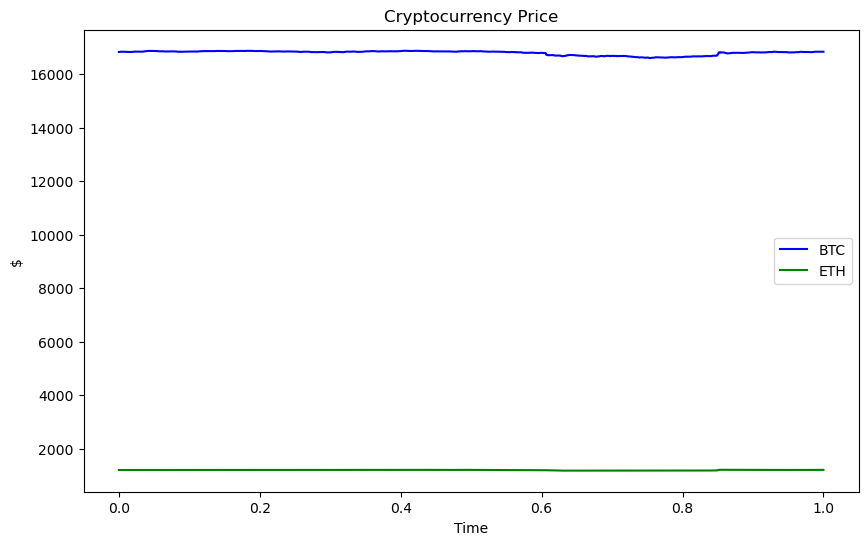

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'g', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cryptocurrency Price')

Text(0.5, 1.0, 'z')

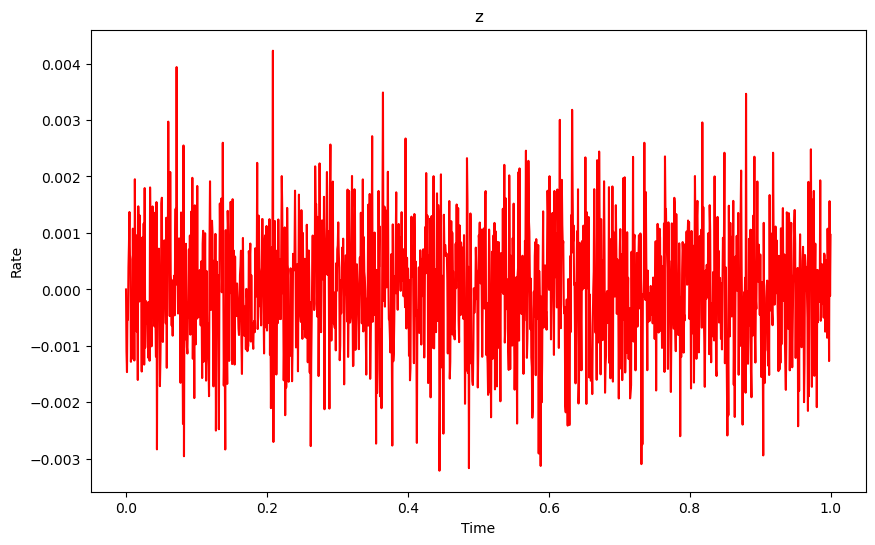

In [19]:
plt.figure(figsize=(10, 6))
# Co-integration vector
plt.plot(tt, z, 'r', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [20]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * ETH_mu * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * ETH_mu ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * ETH_mu * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((BTC_mu + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (BTC_mu + delta * z[t])-b[t]) - rho * ETH_mu/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (ETH_mu / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (BTC_mu + delta * z[t]) - b[t]) - rho * (BTC_mu + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

#### Optimal Weights

Text(0.5, 1.0, 'Weights')

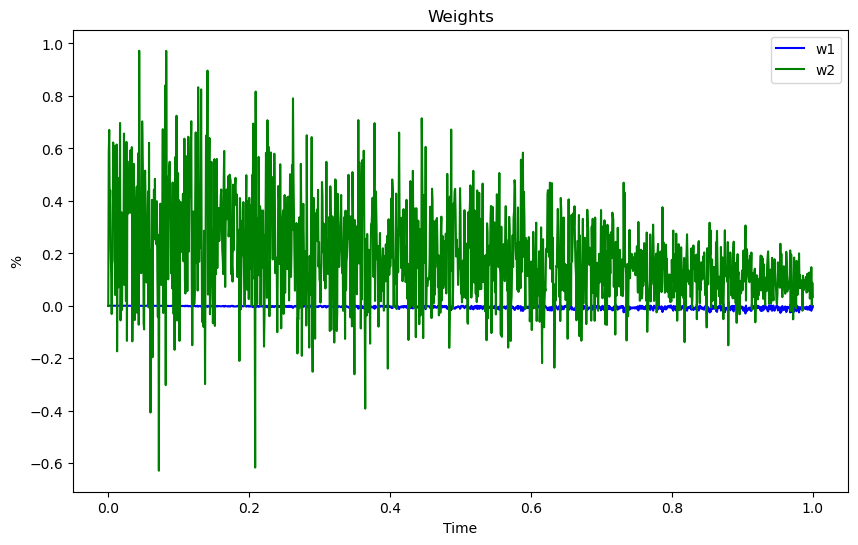

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'g', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

#### Optimal Wealth Process - Negative means selling and you get cash

Text(0.5, 1.0, 'Cash')

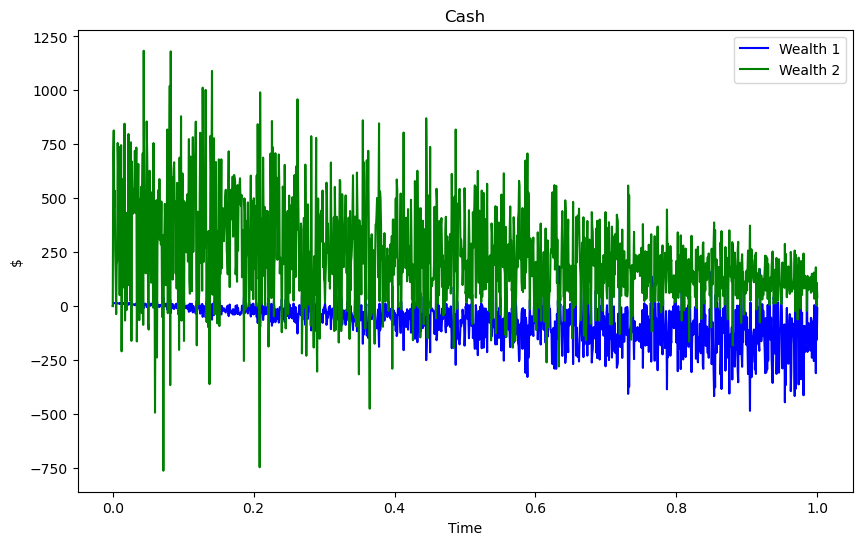

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'g', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [23]:
print("The mean of weights for BTC is ", Pi_1.mean())

The mean of weights for BTC is  -0.003996494916699892


In [24]:
print("The mean of weights for ETH is ", Pi_2.mean())

The mean of weights for ETH is  0.19395419313756063


Text(0.5, 1.0, 'Comparison')

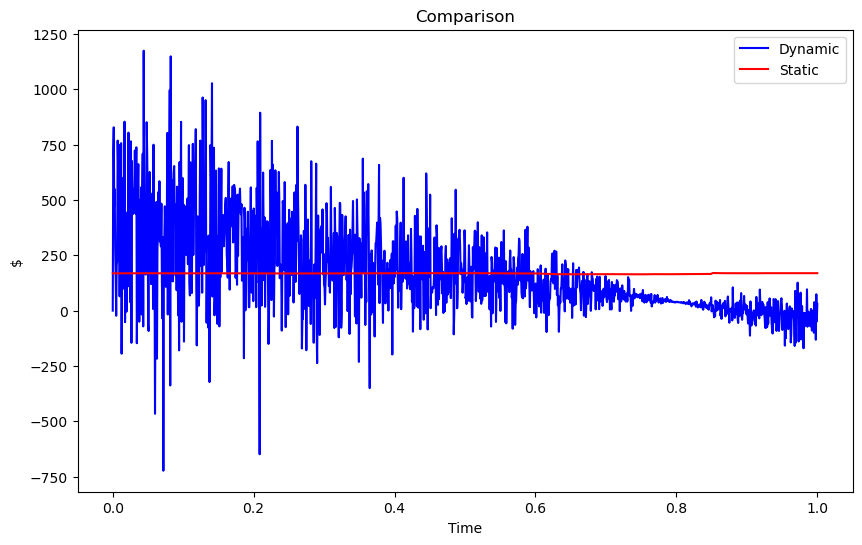

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [26]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

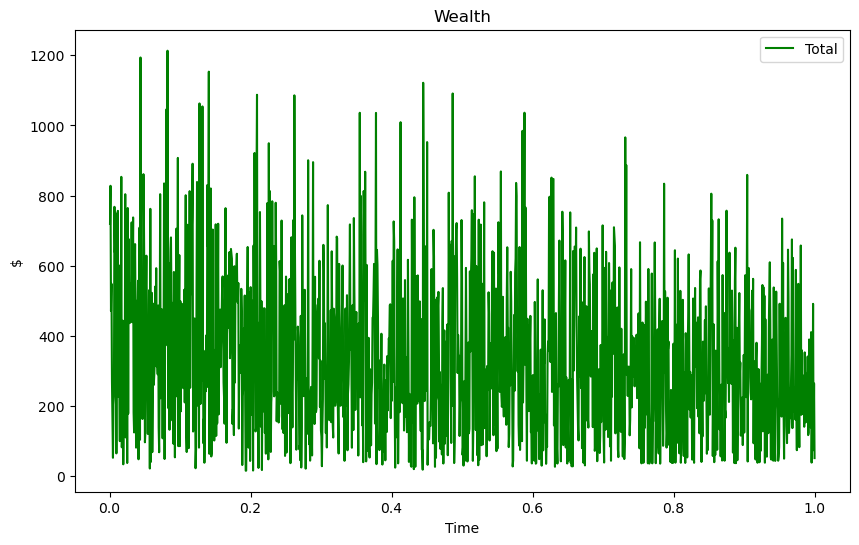

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'g', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

### Inital Wealth

In [28]:
Wealth[1]

array([719.28671922])

### Final Wealth

In [29]:
Wealth[-1]

array([51.00631233])

### Return

In [30]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([-0.92908765])

### Simulation and Finding control factors

##### Question h

In [31]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [32]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (BTC_mu - sigma_1 ** 2/2 + beta*(ETH_mu - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((BTC_mu + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((ETH_mu - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Cryptocurrency Price')

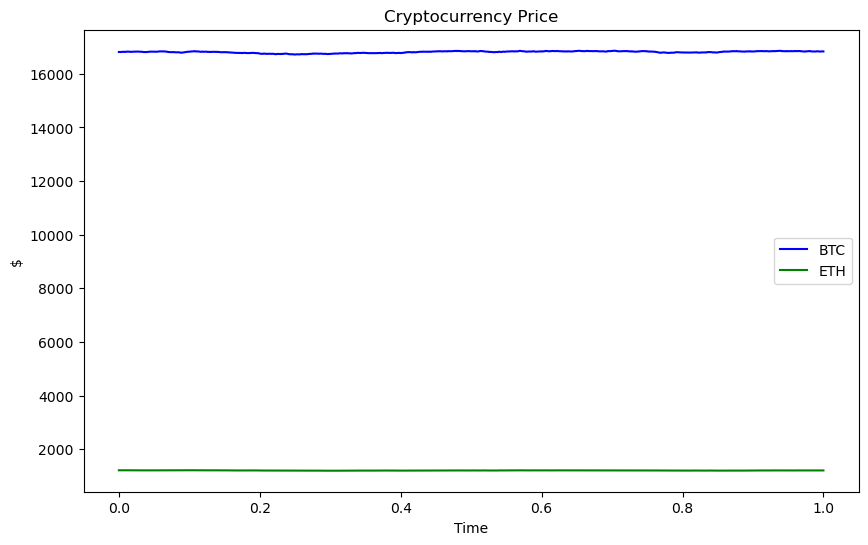

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'g', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cryptocurrency Price')

In [34]:
S1

array([[16818.38085938],
       [16814.50965685],
       [16813.89366241],
       ...,
       [16838.92291736],
       [16839.79779358],
       [16836.42986966]])

In [35]:
S2

array([[1213.67260742],
       [1213.28089501],
       [1213.24137675],
       ...,
       [1208.29629023],
       [1208.27772193],
       [1207.94625292]])

In [36]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * ETH_mu * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * ETH_mu ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * ETH_mu * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((BTC_mu + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (BTC_mu + delta * z[t])-b[t]) - rho * ETH_mu/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (ETH_mu / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (BTC_mu + delta * z[t]) - b[t]) - rho * (BTC_mu + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

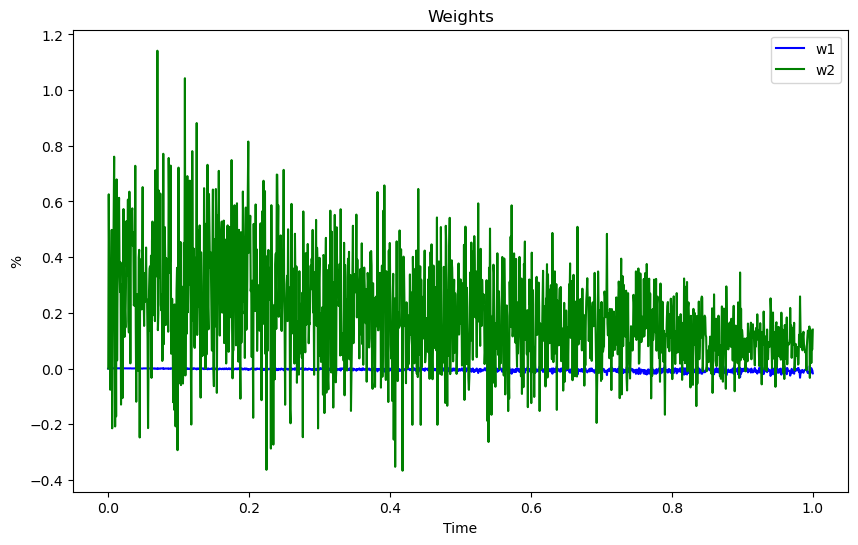

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'g', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

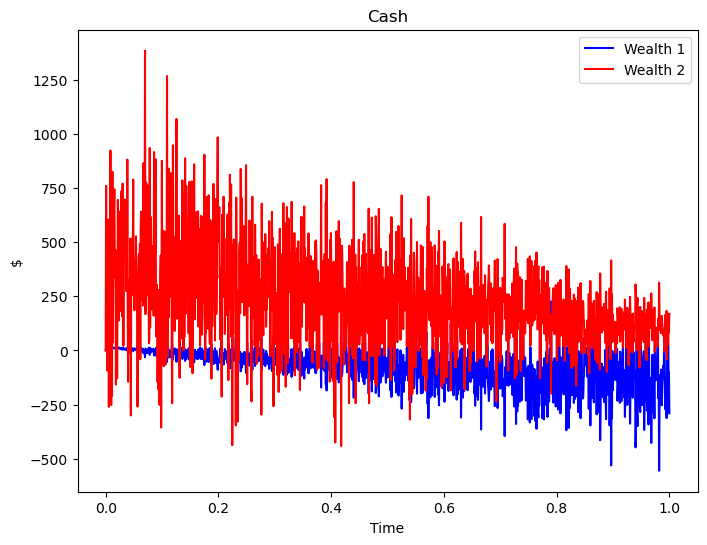

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [39]:
Pi_1.mean()

-0.0038711687627044295

In [40]:
Pi_2.mean()

0.19350469696689612

In [41]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

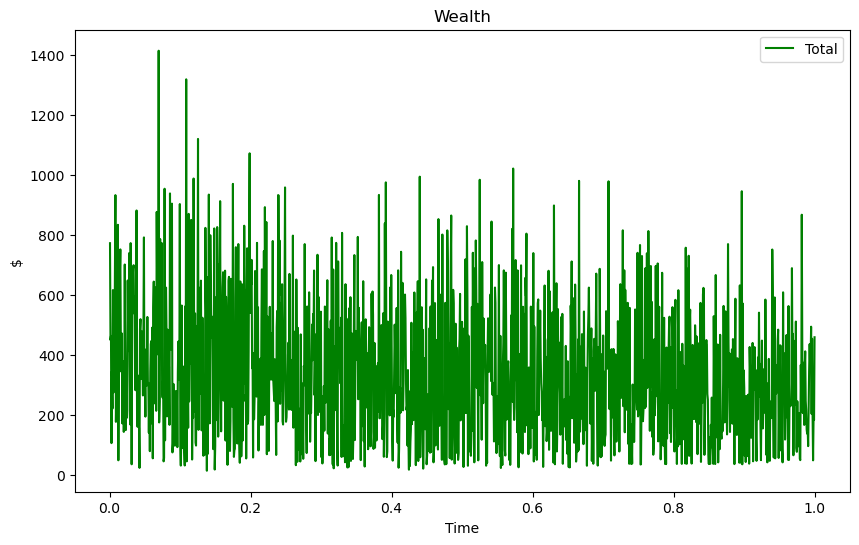

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'g', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

Text(0.5, 1.0, 'Comparison')

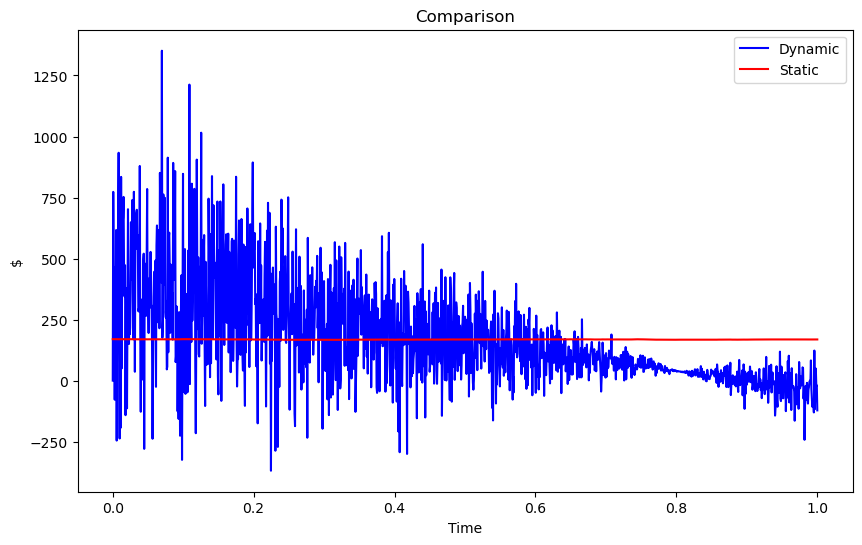

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')